# Case Study 

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mean_data= pd.read_csv("airbnb_listings.csv",encoding="latin1")
mean_data.head()

,host_id,host_name,city,state,zipcode,country,latitude,longitude,property_type,room_type,...,beds,bed_type,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,Michael,New York,NY,10022-4175,United States,40.756852,-73.964754,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$160.00,322,62,86.0,7.0,10.0,9.0
1,2631556,Denise,New York,NY,NaN,United States,40.830599,-73.941014,Apartment,Entire home/apt,...,3.0,Real Bed,NaN,$105.00,348,22,85.0,8.0,7.0,8.0
2,4601412,Miao,Brooklyn,NY,11221,United States,40.692189,-73.924120,Apartment,Private room,...,2.0,Real Bed,NaN,$58.00,227,35,98.0,10.0,9.0,10.0
3,198425,Sara,New York,NY,10011,United States,40.734751,-74.002592,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$185.00,274,26,96.0,9.0,10.0,9.0
4,22590025,Charles,New York,NY,10011,United States,40.745282,-73.997836,Apartment,Entire home/apt,...,2.0,Real Bed,NaN,$195.00,365,1,100.0,10.0,10.0,10.0


In [94]:
#convert data type of price column to float and remove $ and , from the price column
mean_data['price'] = mean_data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
mean_data['price']

0        160.0
1        105.0
2         58.0
3        185.0
4        195.0
         ...  
27387    130.0
27388    139.0
27389     99.0
27390     55.0
27391    110.0
Name: price, Length: 27392, dtype: float64

# 1. Define problem statement and perform Exploratory Data Analysis


### a. Observations on shape of data and data types of all attributes

In [233]:
#checl shape of the data
print(mean_data.shape)
mean_data.info()


(27392, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27392 entries, 0 to 27391
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    27392 non-null  int64  
 1   host_name                  27392 non-null  object 
 2   city                       27392 non-null  object 
 3   state                      27390 non-null  object 
 4   zipcode                    27230 non-null  object 
 5   country                    27391 non-null  object 
 6   latitude                   27392 non-null  float64
 7   longitude                  27392 non-null  float64
 8   property_type              27386 non-null  object 
 9   room_type                  27392 non-null  object 
 10  accommodates               27392 non-null  int64  
 11  bathrooms                  26929 non-null  float64
 12  bedrooms                   27252 non-null  float64
 13  beds                       27294 n

### b. Check for missing value (if any)

In [234]:
# check for missing values
mean_data.isnull().sum()

host_id                          0
host_name                        0
city                             0
state                            2
zipcode                        162
country                          1
latitude                         0
longitude                        0
property_type                    6
room_type                        0
accommodates                     0
bathrooms                      463
bedrooms                       140
beds                            98
bed_type                         0
square_feet                  26386
price                            0
availability_365                 0
number_of_reviews                0
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64

### c. Display the statistical summary

In [235]:
mean_data.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
count,2.739200e+04,27392.000000,27392.000000,27392.000000,26929.000000,27252.000000,27294.000000,1006.000000,27392.000000,27392.000000,27392.000000,18735.000000,18661.000000,18660.000000,18658.000000
mean,8.518927e+06,40.733070,-73.964276,2.892779,1.116287,1.135660,1.531289,720.210736,171.256900,262.919210,10.130221,92.218895,9.011093,9.248660,9.125737
std,7.510027e+06,0.048968,0.035162,1.755137,0.369832,0.667599,1.098971,652.795558,224.690732,125.668249,18.665400,8.336264,1.163870,0.973474,0.906612
min,2.830000e+02,40.509611,-74.239539,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000
25%,2.104498e+06,40.699655,-73.988449,2.000000,1.000000,1.000000,1.000000,371.250000,85.000000,177.000000,0.000000,89.000000,8.000000,9.000000,9.000000
50%,6.119374e+06,40.728024,-73.966075,2.000000,1.000000,1.000000,1.000000,650.000000,130.000000,333.000000,3.000000,94.000000,9.000000,10.000000,9.000000
75%,1.392422e+07,40.764030,-73.947260,4.000000,1.000000,1.000000,2.000000,913.250000,199.000000,363.000000,11.000000,99.000000,10.000000,10.000000,10.000000
max,2.546867e+07,40.907704,-73.726710,16.000000,8.000000,10.000000,16.000000,12000.000000,8000.000000,365.000000,221.000000,100.000000,10.000000,10.000000,10.000000


### d. Univariate Analysis and Bivariate Analysis of all the attributes

#### Univeriate

In [95]:
# select price column as target variable
target_variable=mean_data['price']

In [96]:
# create a list of numerical and categorical columns
numerical_data= mean_data.select_dtypes(include=["int","float"]).columns
categorical_data= mean_data.select_dtypes(include=['object']).columns
mean_data[numerical_data]

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,40.756852,-73.964754,2,1.0,1.0,1.0,NaN,160.0,322,62,86.0,7.0,10.0,9.0
1,2631556,40.830599,-73.941014,10,1.0,3.0,3.0,NaN,105.0,348,22,85.0,8.0,7.0,8.0
2,4601412,40.692189,-73.924120,2,1.0,1.0,2.0,NaN,58.0,227,35,98.0,10.0,9.0,10.0
3,198425,40.734751,-74.002592,2,1.0,1.0,1.0,NaN,185.0,274,26,96.0,9.0,10.0,9.0
4,22590025,40.745282,-73.997836,2,1.0,1.0,2.0,NaN,195.0,365,1,100.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27387,1485898,40.742363,-73.981968,2,NaN,1.0,1.0,NaN,130.0,365,3,98.0,9.0,10.0,9.0
27388,5944682,40.759642,-73.985343,2,1.0,1.0,1.0,NaN,139.0,332,47,95.0,9.0,10.0,9.0
27389,2675644,40.645741,-74.080955,6,1.0,2.0,3.0,NaN,99.0,357,2,90.0,9.0,9.0,8.0
27390,322716,40.669931,-73.946820,3,1.0,1.0,1.0,350.0,55.0,93,3,100.0,10.0,9.0,10.0


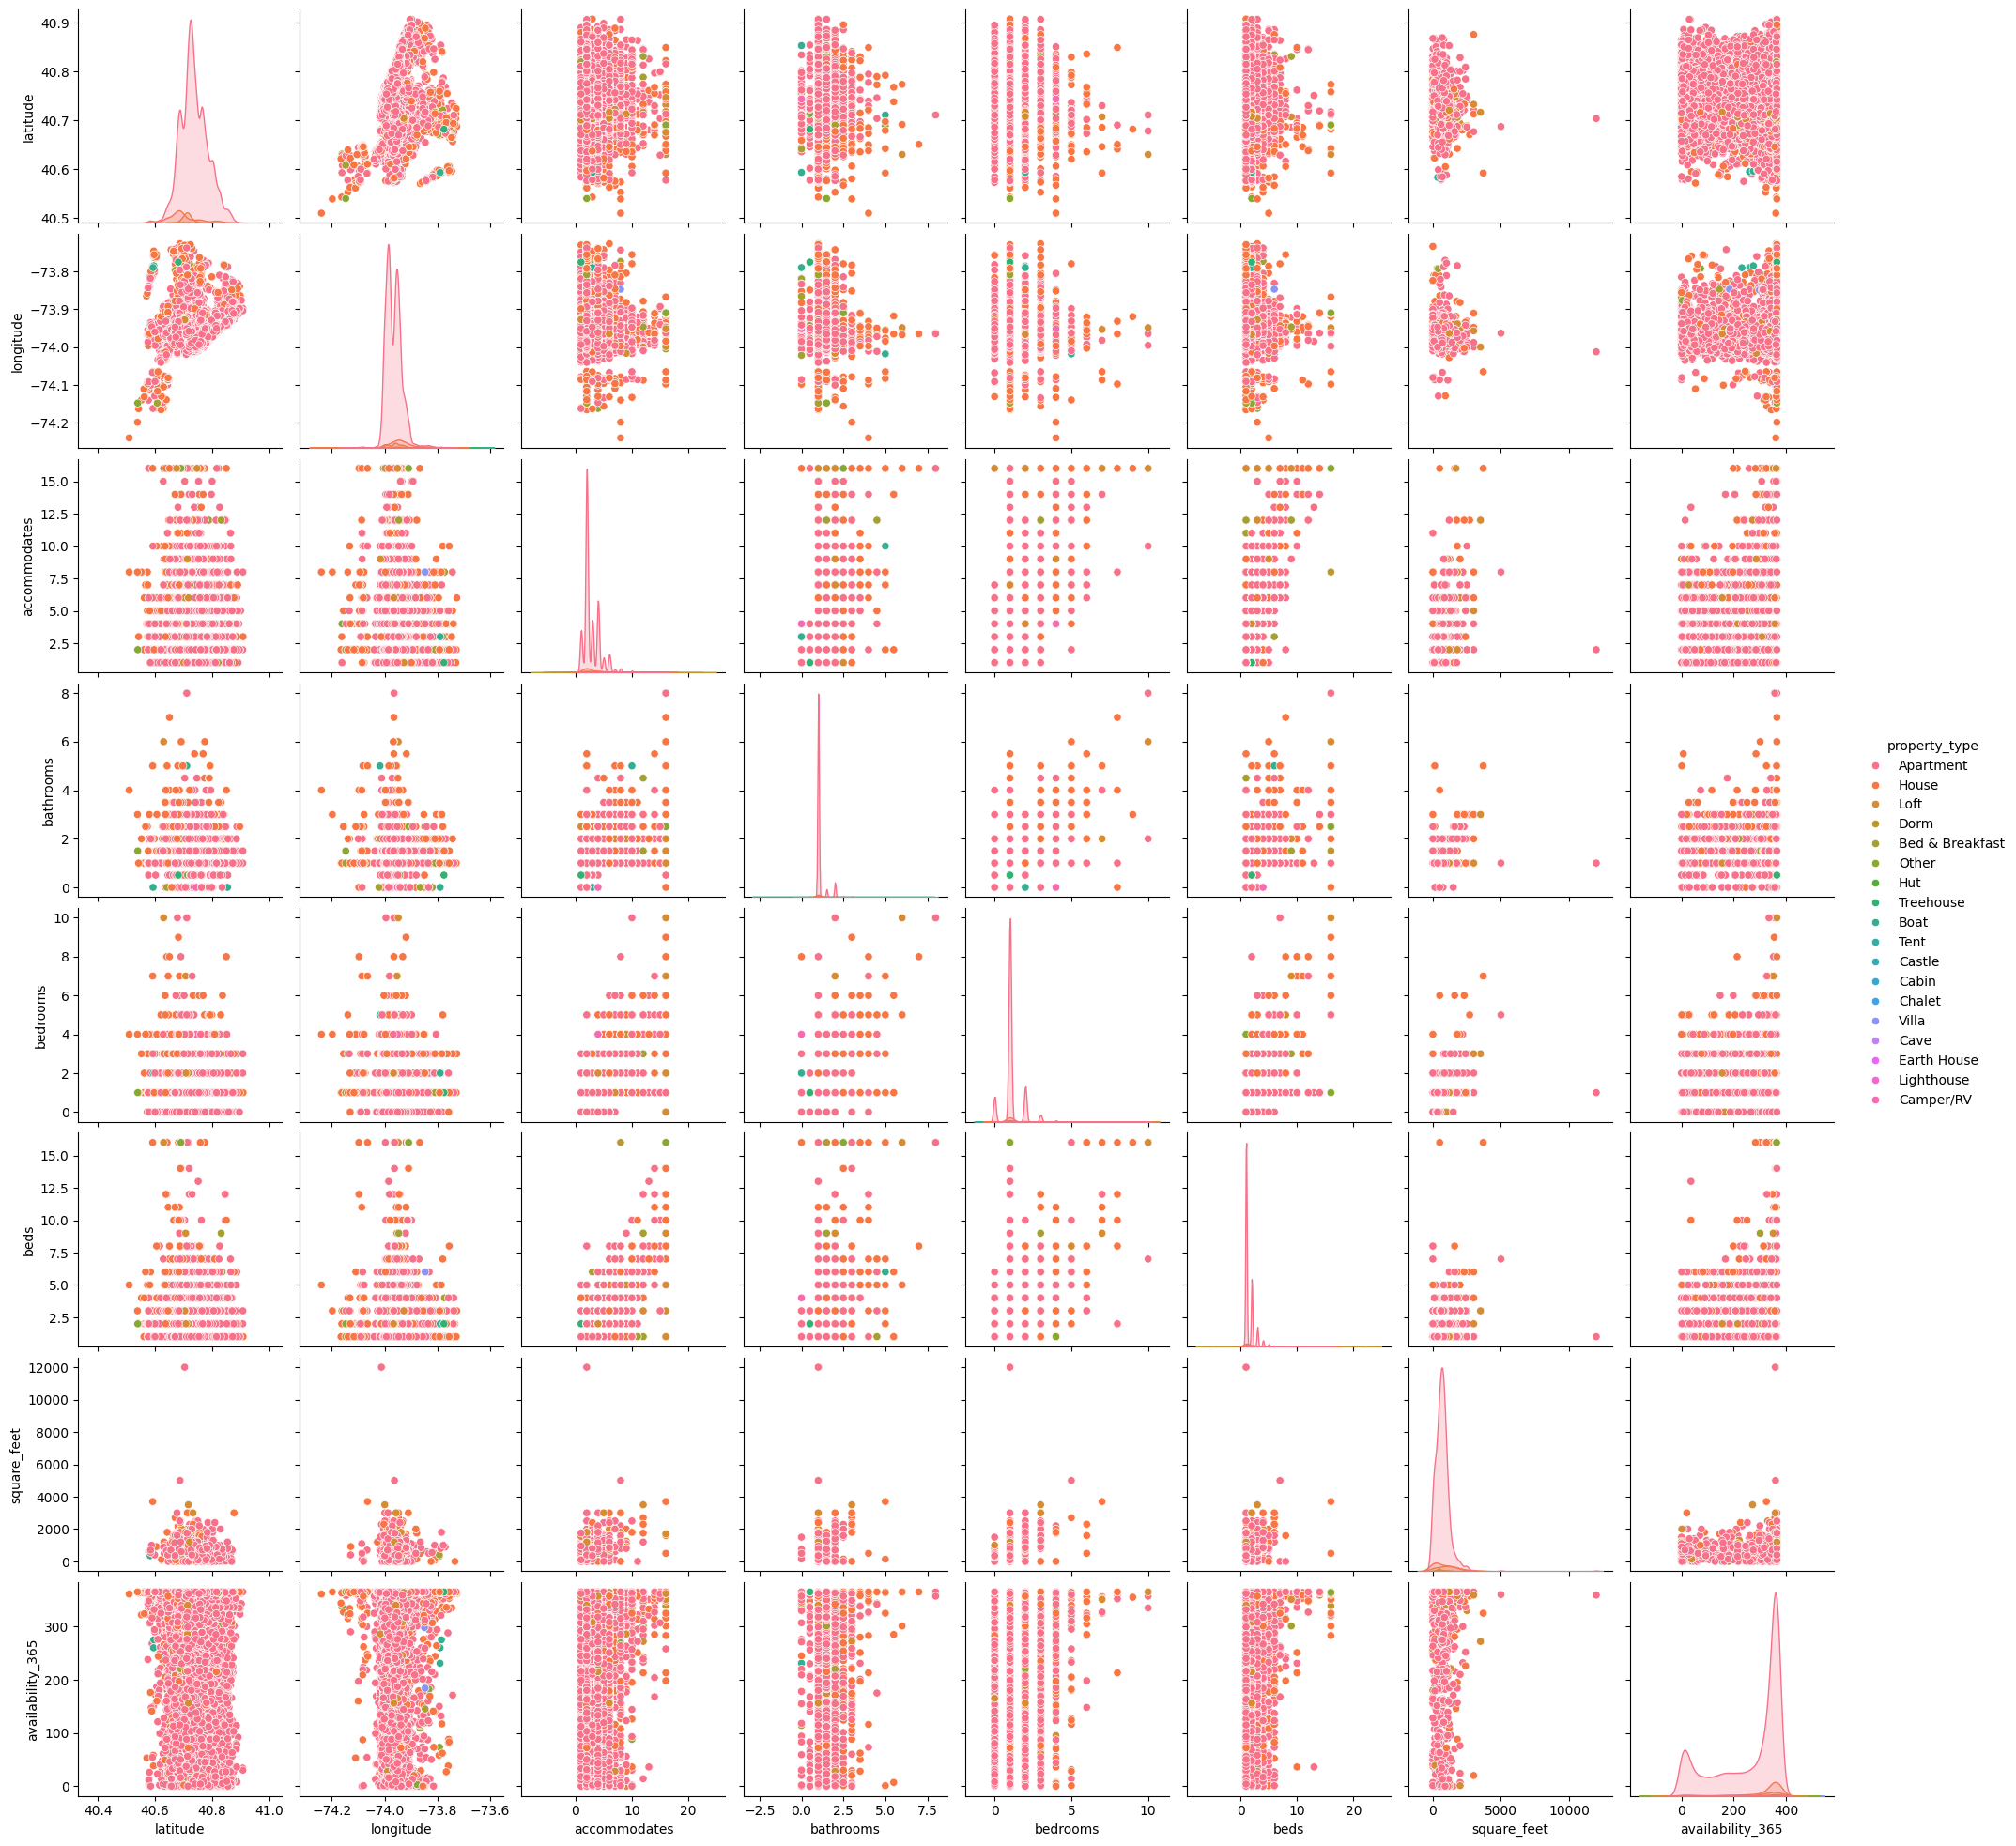

In [238]:
# check for correlation between numerical columns
sns.pairplot(mean_data, vars=['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds','square_feet','availability_365'], hue="property_type")

<function matplotlib.pyplot.show(close=None, block=None)>

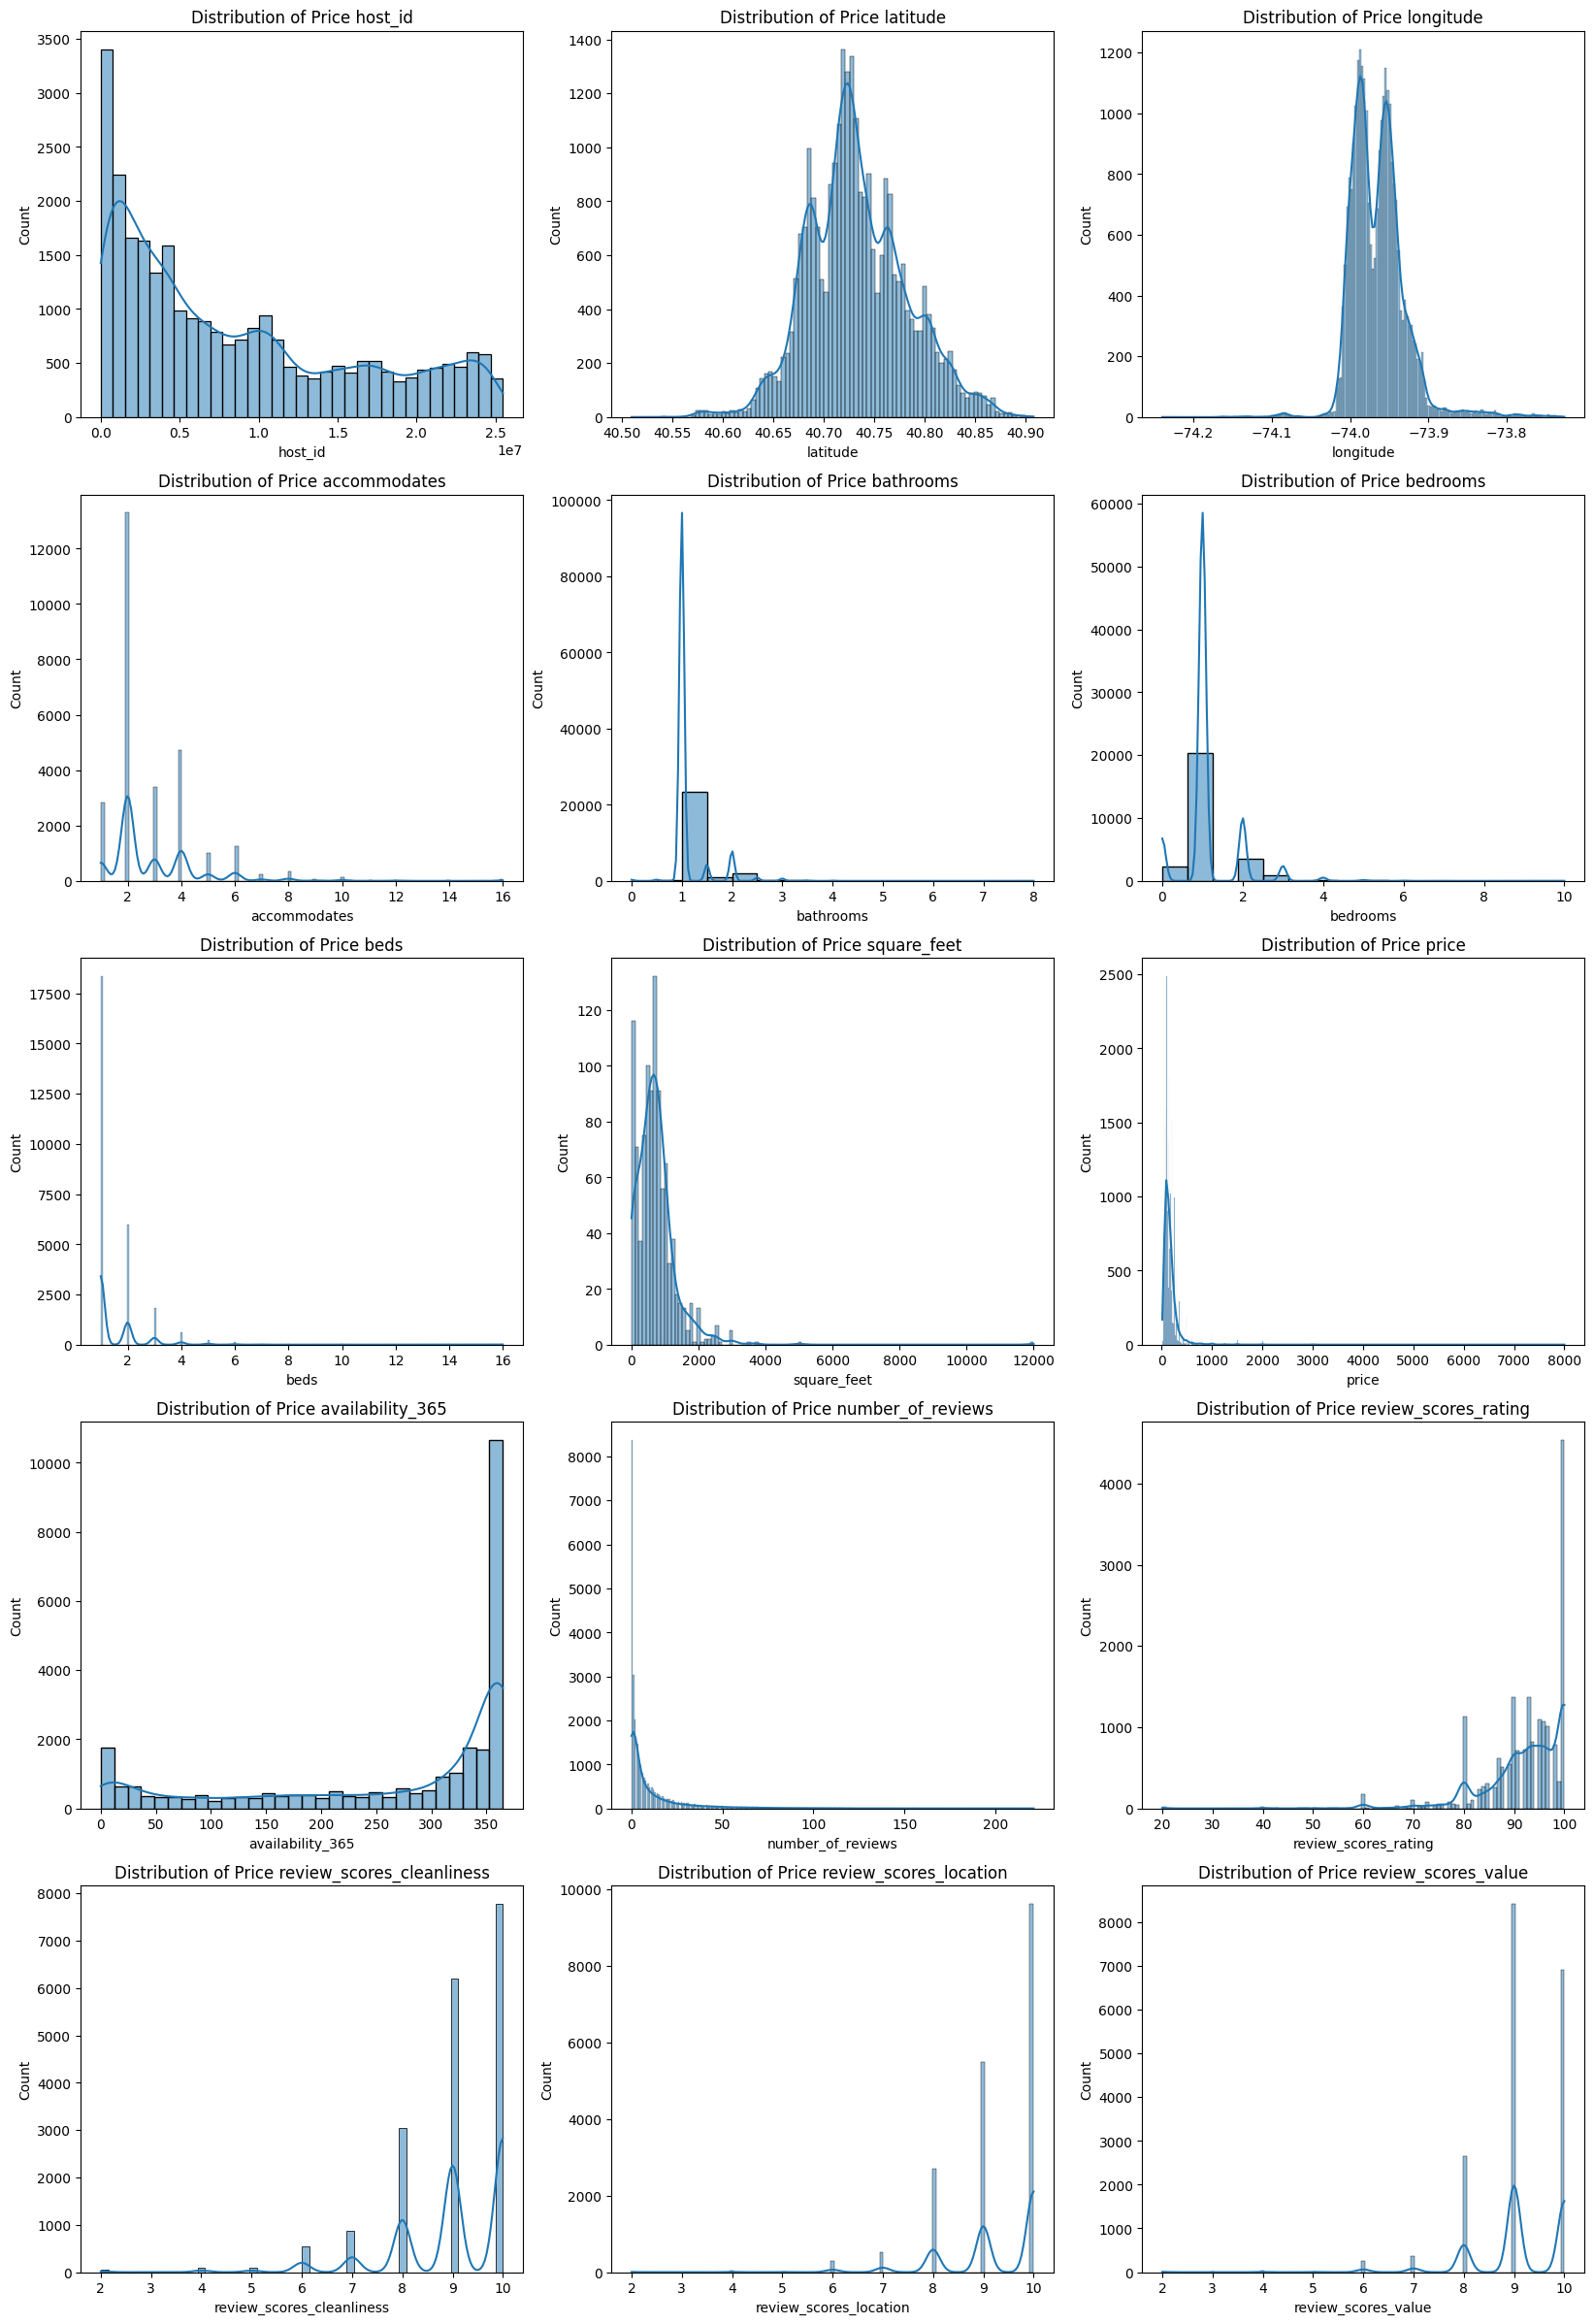

In [239]:
# create a histplot for numerical columns
i = 1
plt.figure(figsize=(20,30))
for col in numerical_data:
    plt.subplot(5,3,i)
    sns.histplot(mean_data[col], kde=True)
    plt.title(f"Distribution of Price {col}")
    i+=1

plt.show

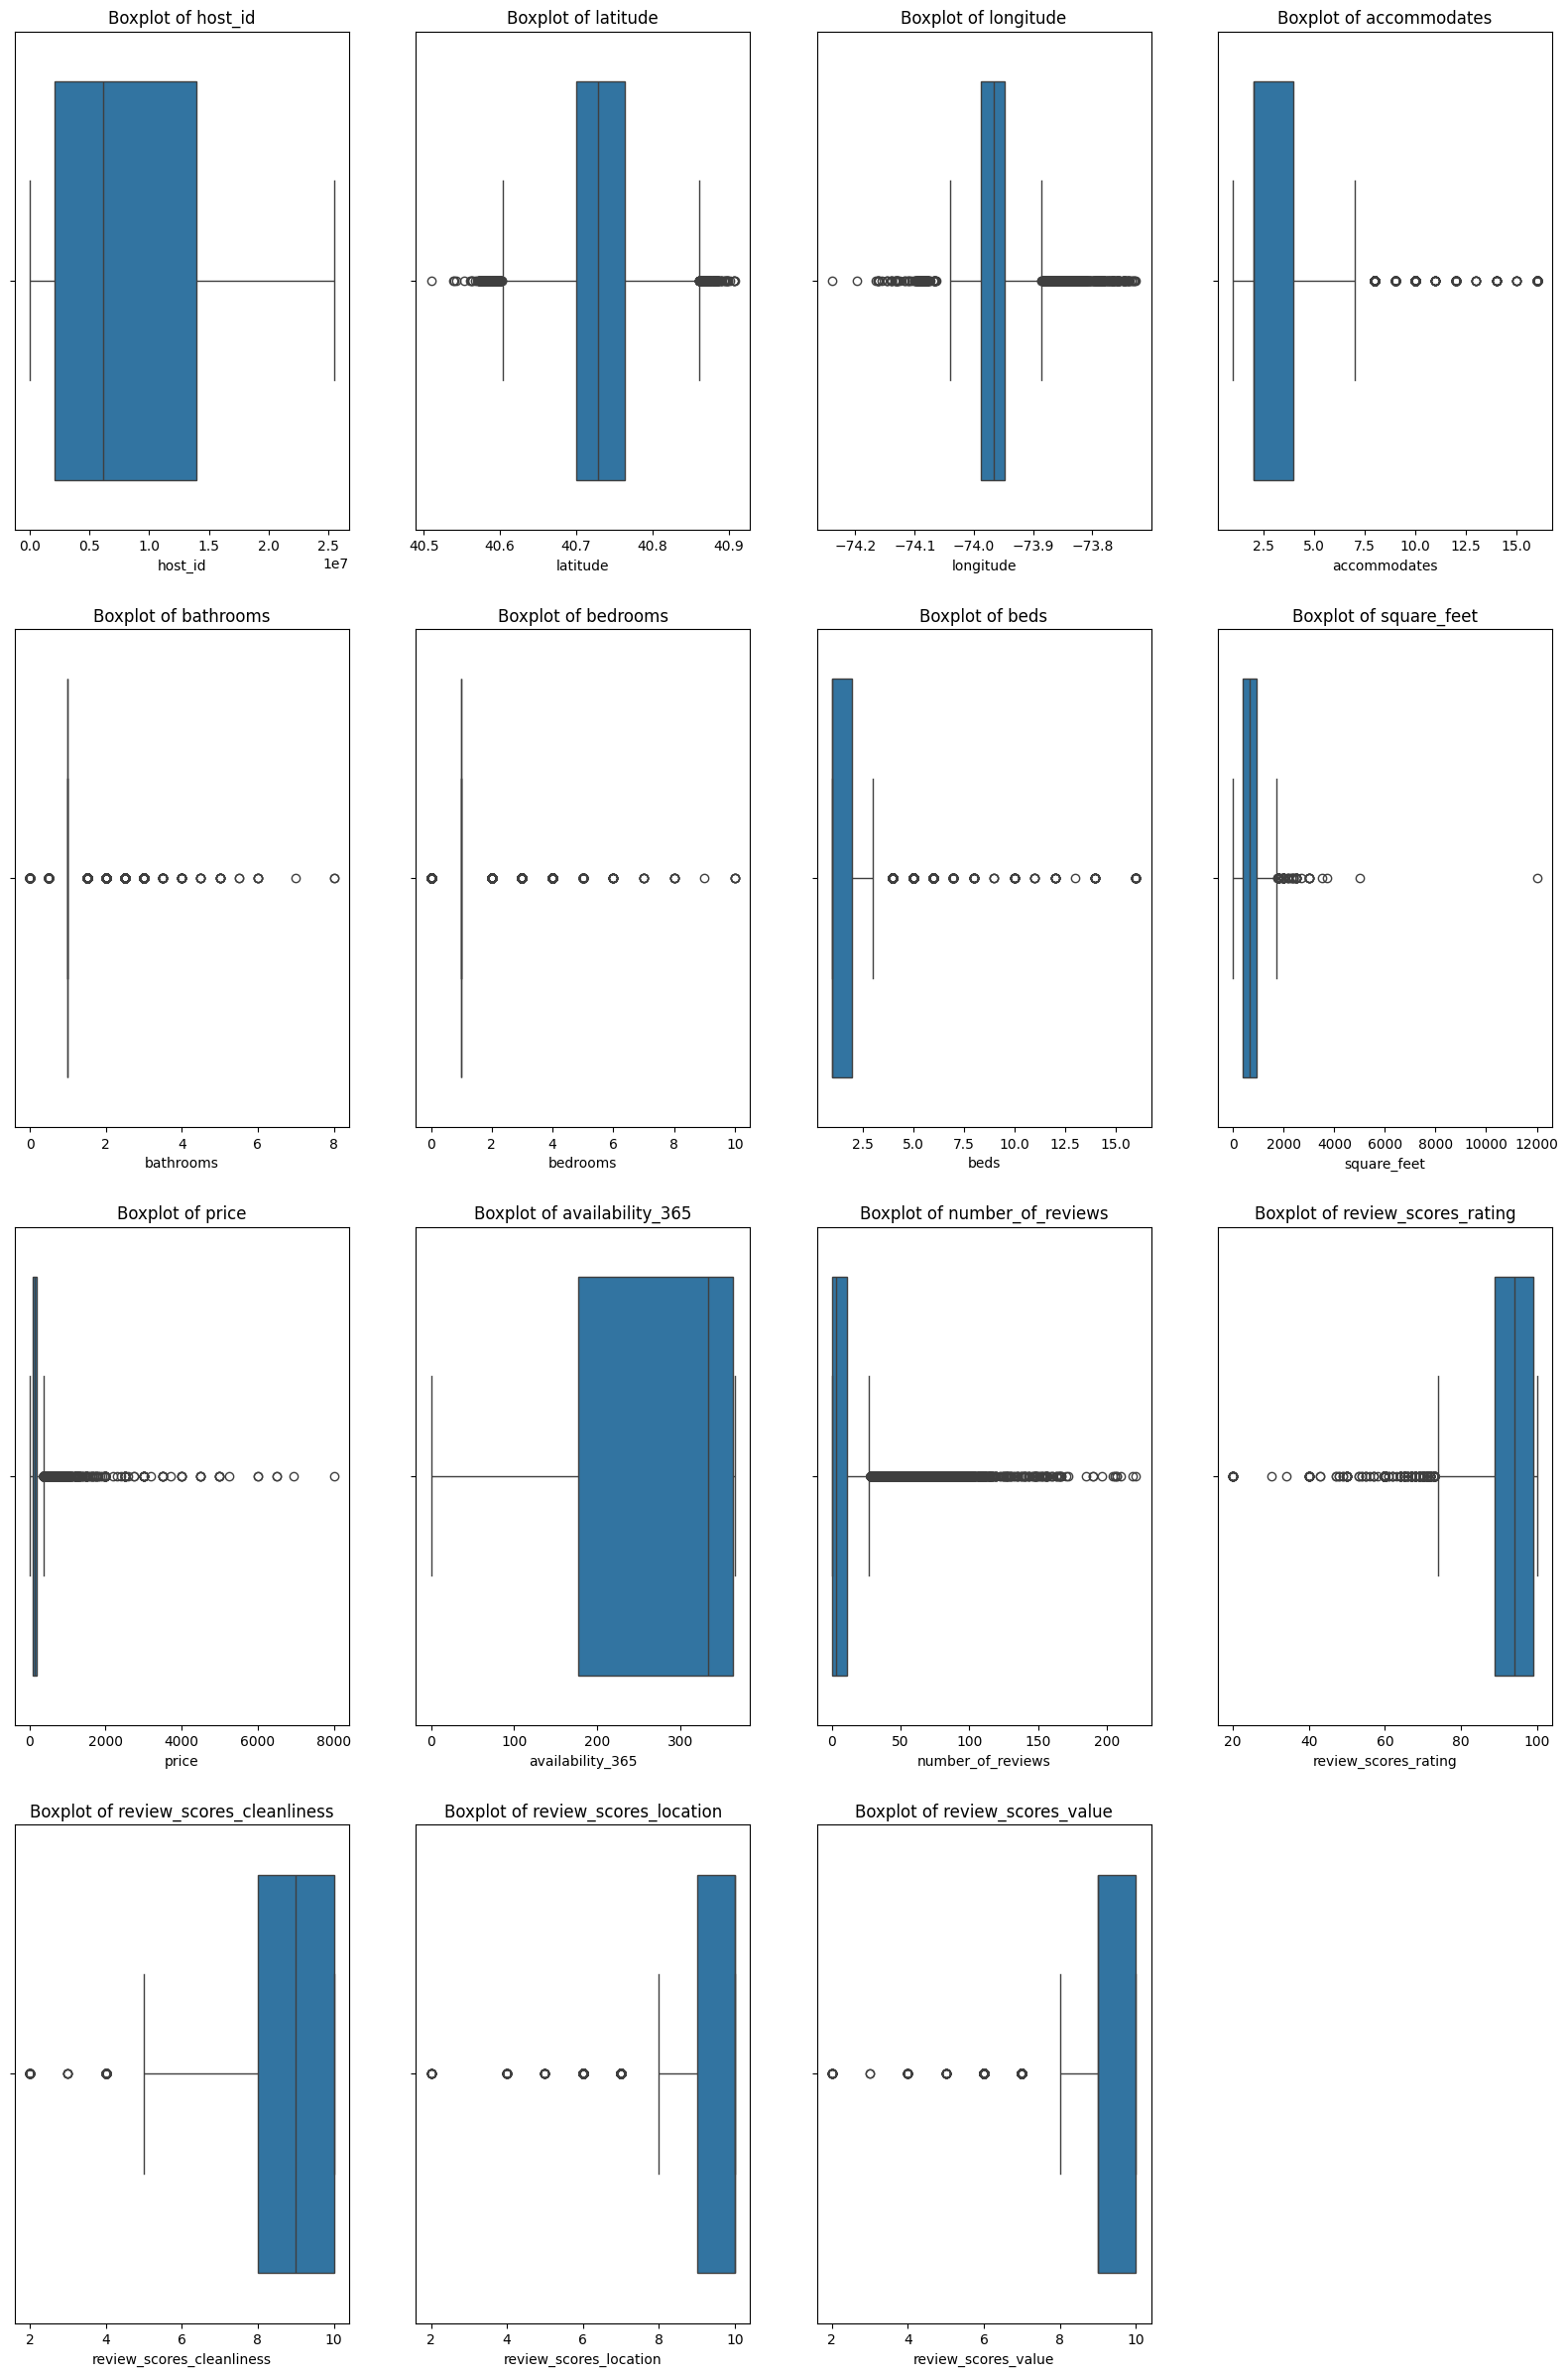

In [240]:
# create a boxplot for numerical columns
i = 1
plt.figure(figsize=(20,30))
for col in numerical_data:
    plt.subplot(4,4,i)   
    sns.boxplot(x=mean_data[col])
    plt.title(f"Boxplot of {col}")
    i+=1
plt.show()

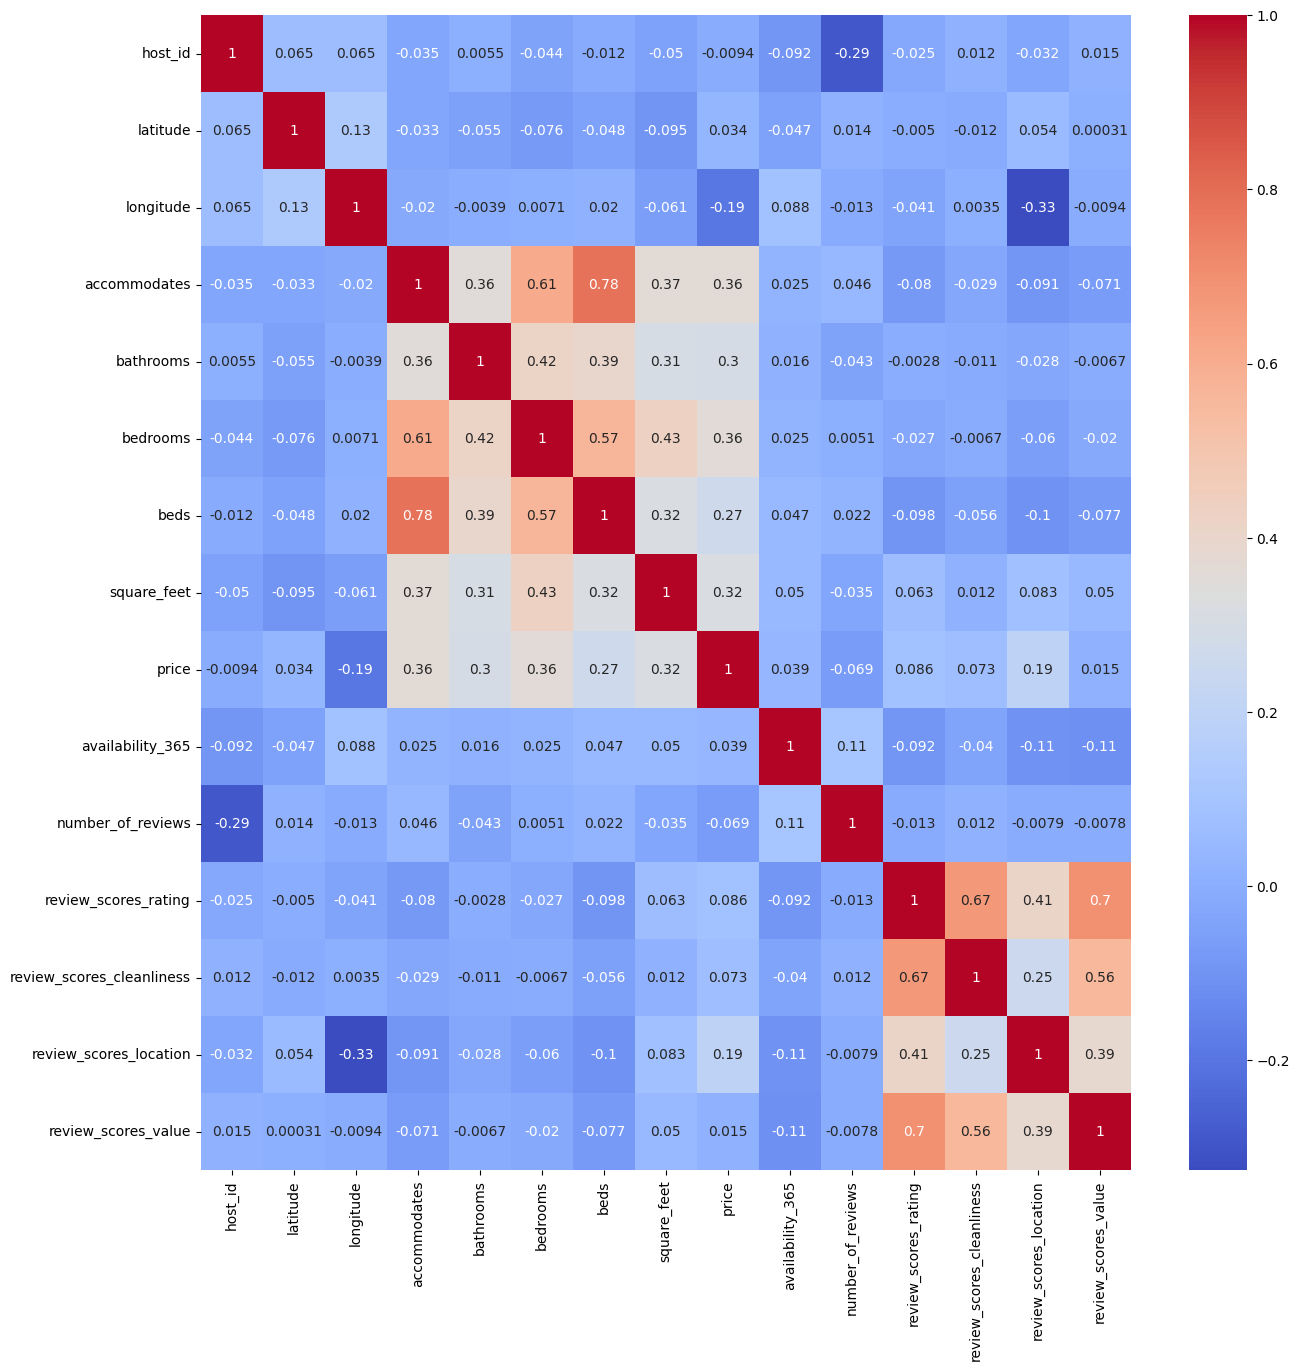

In [241]:
# create a heatmap for numerical columns
plt.figure(figsize=(15,15))
sns.heatmap(data=mean_data[numerical_data].corr(), annot=True, cmap='coolwarm')
plt.show()

#### Bivariate

In [242]:
mean_data[categorical_data].head()

,host_name,city,state,zipcode,country,property_type,room_type,bed_type
0,Michael,New York,NY,10022-4175,United States,Apartment,Entire home/apt,Real Bed
1,Denise,New York,NY,NaN,United States,Apartment,Entire home/apt,Real Bed
2,Miao,Brooklyn,NY,11221,United States,Apartment,Private room,Real Bed
3,Sara,New York,NY,10011,United States,Apartment,Entire home/apt,Real Bed
4,Charles,New York,NY,10011,United States,Apartment,Entire home/apt,Real Bed


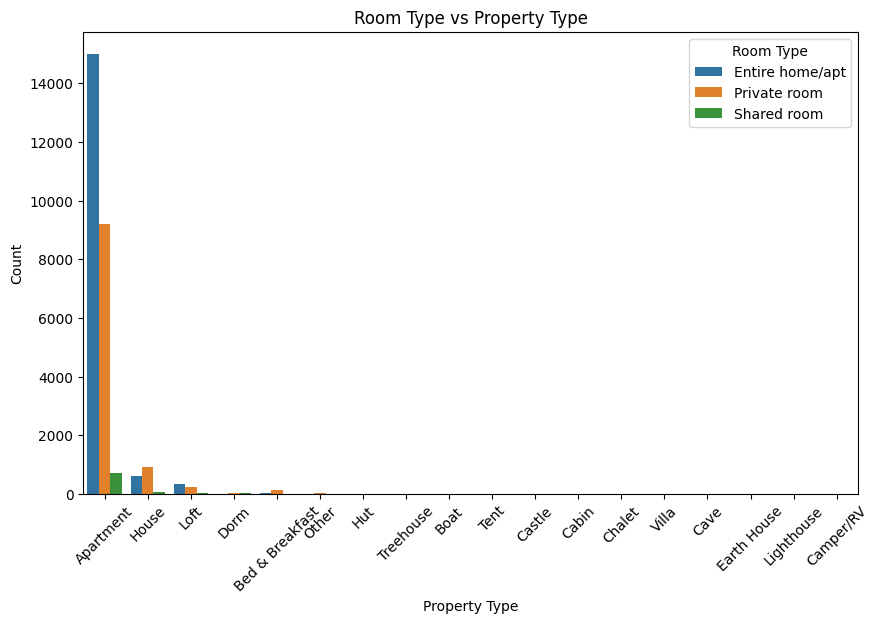

In [243]:
# Room Type vs Property Type
plt.figure(figsize=(10, 6))
sns.countplot(data=mean_data, x='property_type', hue='room_type')
plt.title('Room Type vs Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

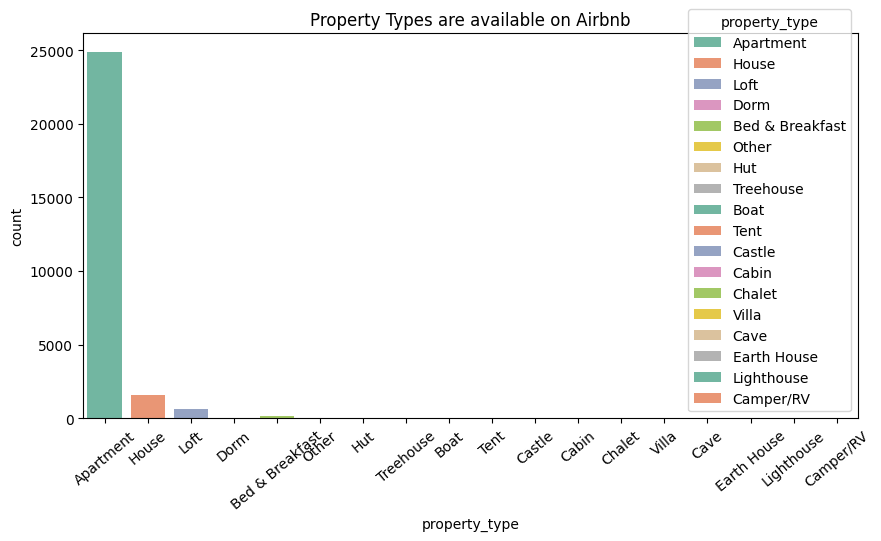

In [244]:
#Property Types are available on Airbnb
plt.figure(figsize=(10,5))
plt.title("Property Types are available on Airbnb")
sns.countplot(x="property_type",data=mean_data,palette="Set2",hue="property_type")
plt.xticks(rotation=40)
plt.show()

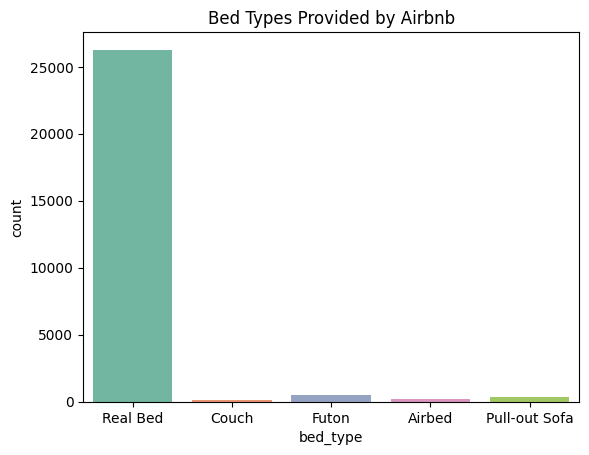

In [245]:
# Bed Types Provided by Airbnb
sns.countplot(x="bed_type",data=mean_data,palette="Set2",hue="bed_type")    
plt.title("Bed Types Provided by Airbnb")
plt.show()

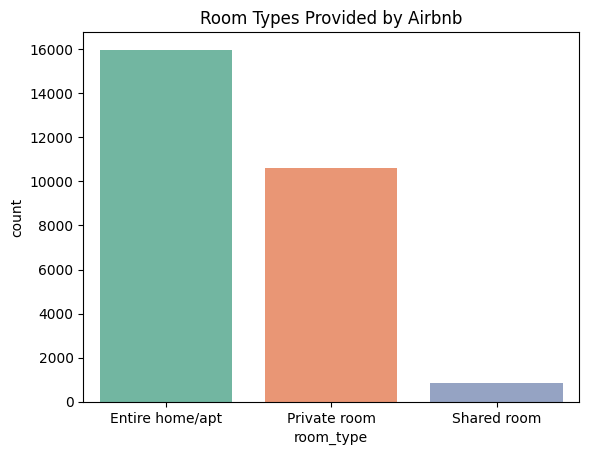

In [246]:
#Room Types Provided by Airbnb
sns.countplot(x="room_type",data=mean_data,palette="Set2",hue="room_type")    
plt.title("Room Types Provided by Airbnb")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

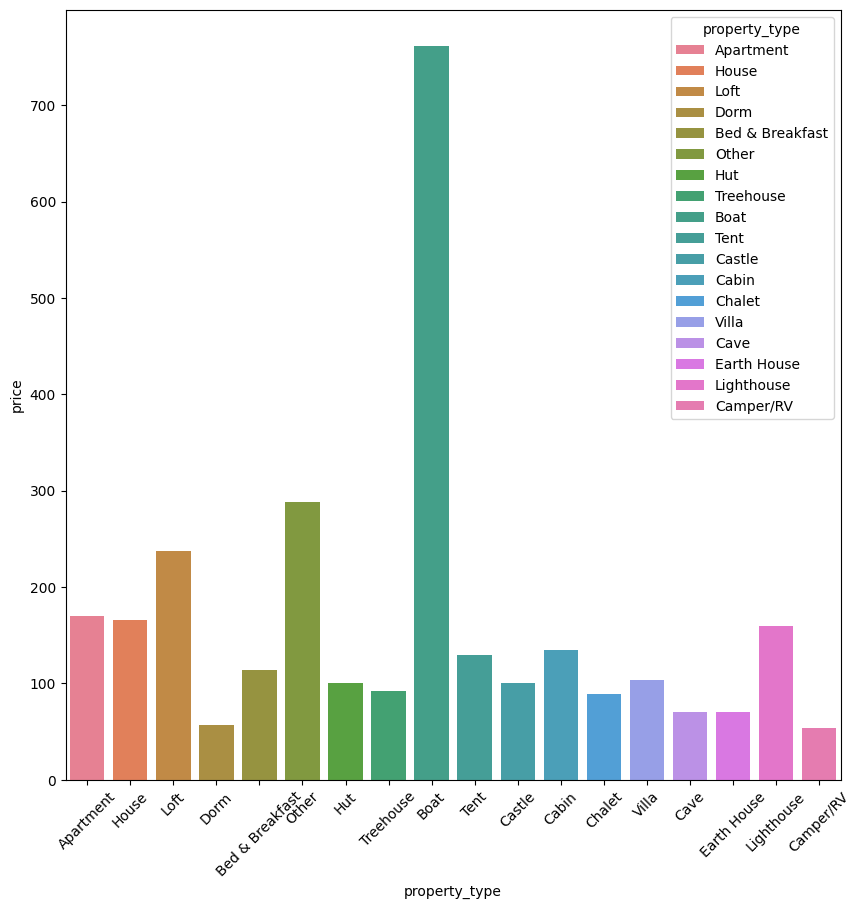

In [247]:
plt.figure(figsize=(10,10))
sns.barplot(data=mean_data,x="property_type",y="price",hue="property_type",errorbar=None)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

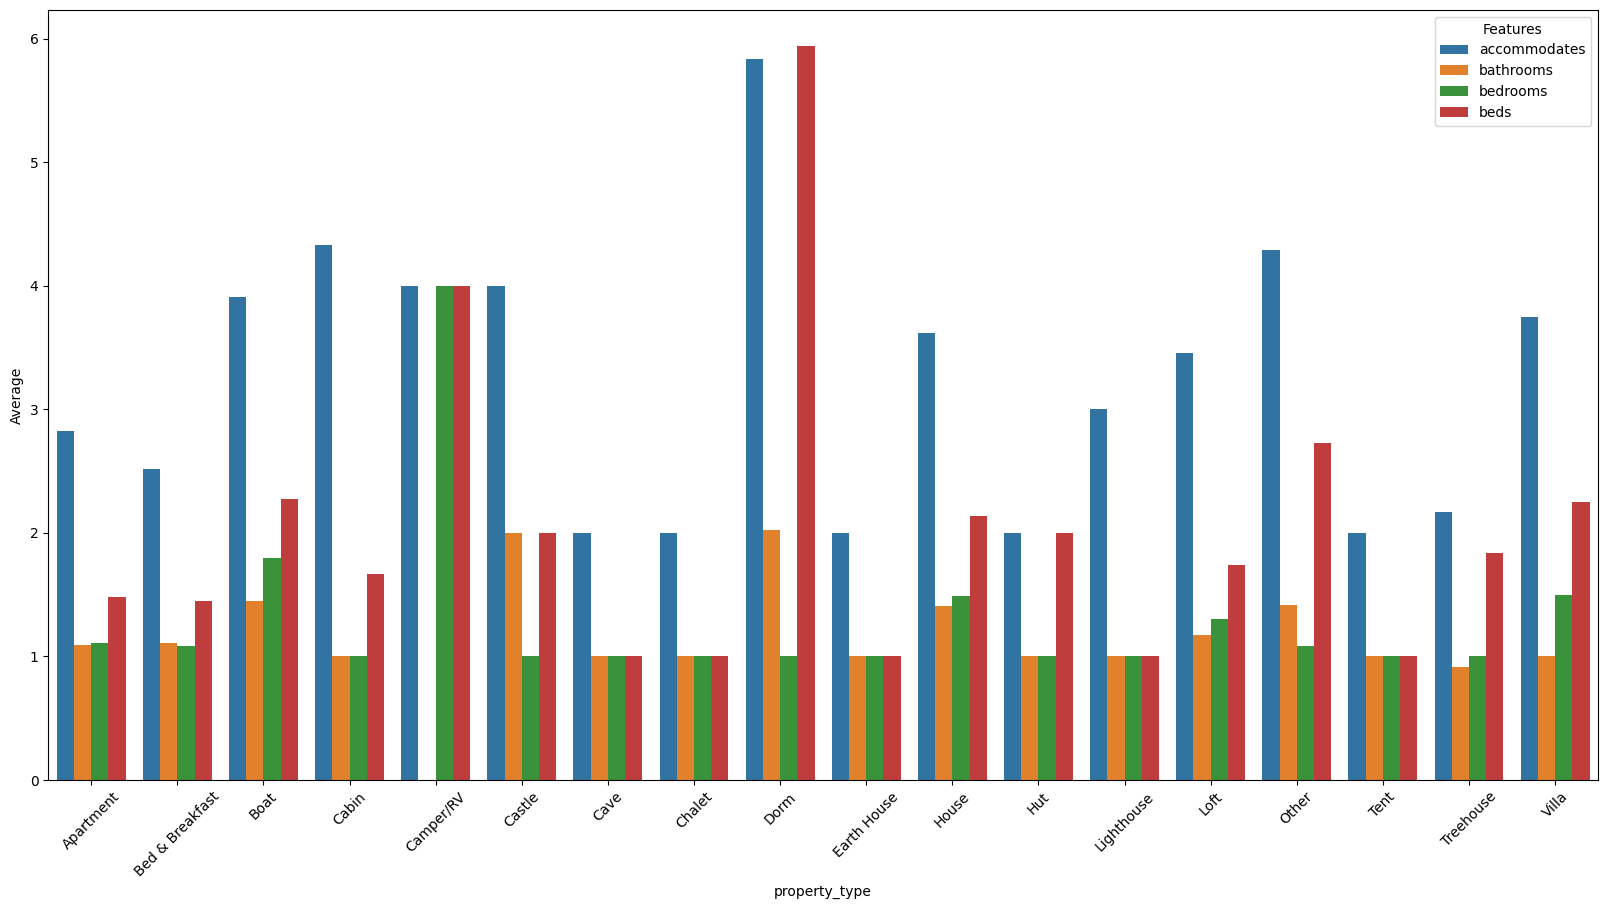

In [248]:
grouped_data=(mean_data.groupby(['property_type']).agg({"accommodates":"mean",
                                                        "bathrooms":"mean",
                                                        "bedrooms":"mean",
                                                        "beds":"mean",}).reset_index())

melt_data=grouped_data.melt(id_vars="property_type",var_name="Features",value_name="Average",value_vars=["accommodates","bathrooms","bedrooms","beds"])

plt.figure(figsize=(20,10))
sns.barplot(data=melt_data,x="property_type",y="Average",hue="Features",errorbar=None)
plt.xticks(rotation=45)
plt.show

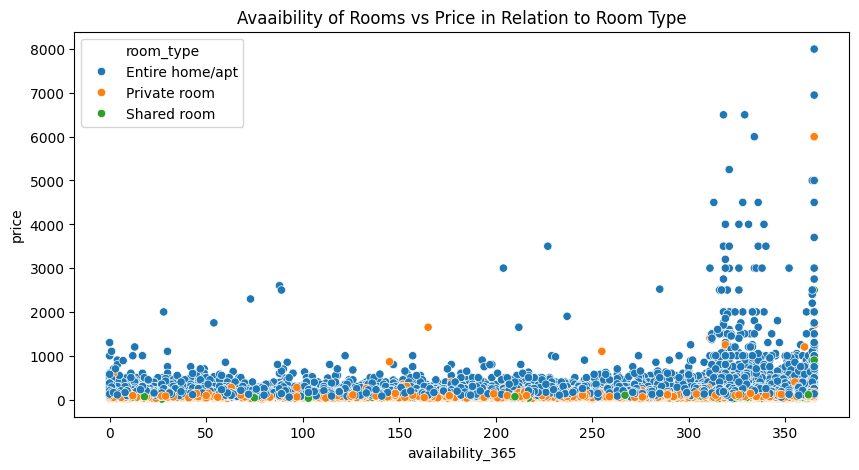

In [249]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=mean_data,x="availability_365",y="price",hue="room_type")
plt.title("Avaaibility of Rooms vs Price in Relation to Room Type")
plt.show()

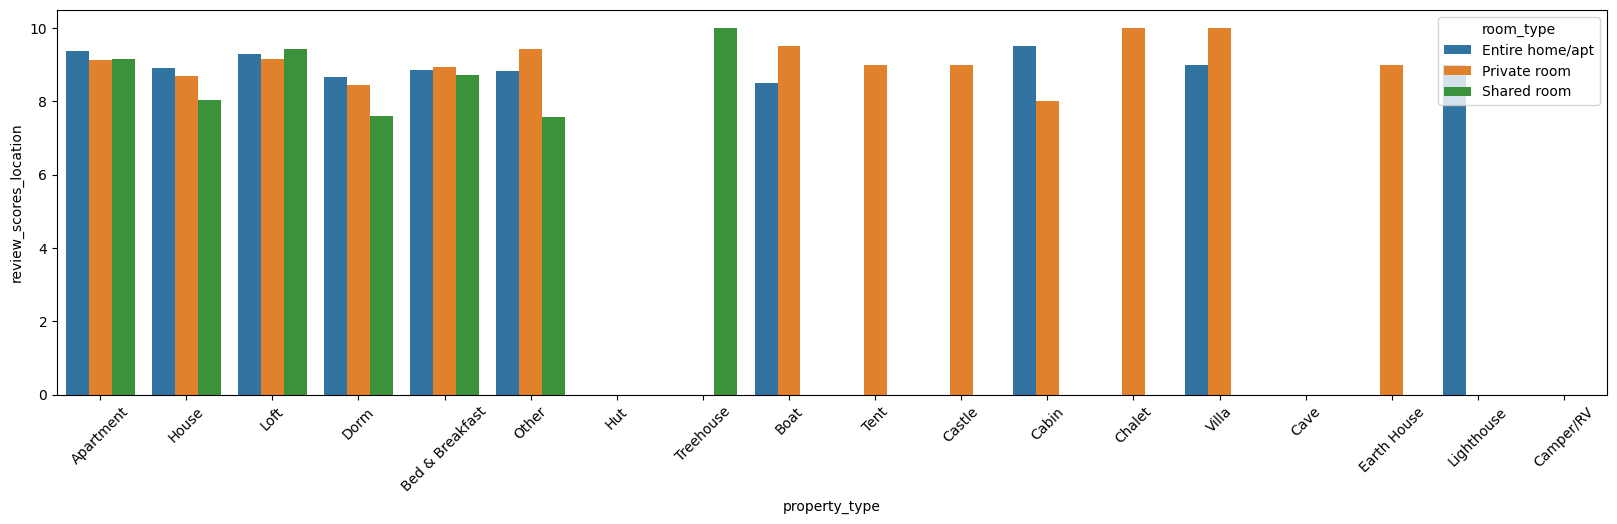

In [250]:
plt.figure(figsize=(20,5))

sns.barplot(data=mean_data,x="property_type",y="review_scores_location",hue="room_type",errorbar=None)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x2000 with 0 Axes>

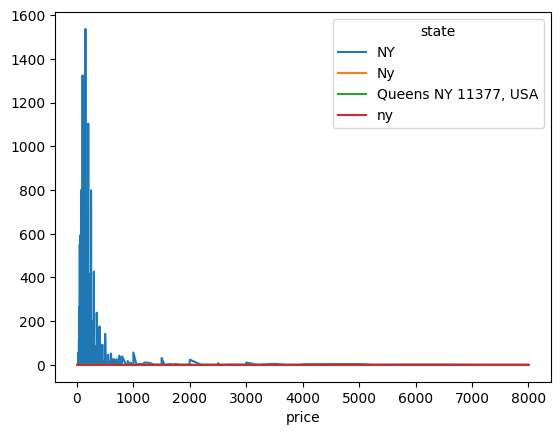

In [251]:
crosstab = pd.crosstab(target_variable, mean_data['state'])
plt.figure(figsize=(10, 20))
crosstab.plot()
plt.show()

In [252]:
import folium as fl

# Define data_most_expensive as the subset of mean_data with the highest prices
data_map = mean_data.nlargest(100, 'price')

# Sample 50 rows from the most expensive region data
data_sample = data_map.sample(50, random_state=1)

# Calculate the average location for centering the map
average_location = [data_sample['latitude'].mean(), data_sample['longitude'].mean()]

# Create the map object
map_sample = fl.Map(location=average_location, zoom_start=14, control_scale=True)

# Add markers to the map
for _, location_info in data_sample.iterrows():
    marker_location = [location_info['latitude'], location_info['longitude']]
    marker_popup = location_info['property_type']
    fl.Marker(location=marker_location, popup=marker_popup).add_to(map_sample)
map_sample

# 2. Data Preprocessing

#### A. check duplicate values

In [97]:
duplicate=mean_data.duplicated()
duplicate.sum()
duplicate.shape
mean_data.nunique()

host_id                      22342
host_name                     7381
city                           185
state                            4
zipcode                        185
country                          1
latitude                     27373
longitude                    27357
property_type                   18
room_type                        3
accommodates                    16
bathrooms                       15
bedrooms                        11
beds                            15
bed_type                         5
square_feet                    182
price                          452
availability_365               366
number_of_reviews              171
review_scores_rating            56
review_scores_cleanliness        9
review_scores_location           8
review_scores_value              9
dtype: int64

#### b. Feature Engineering

In [98]:
mean_data['location_group'] = pd.cut(mean_data['latitude'], bins=5, labels=False).astype(str) + "_" + \
                         pd.cut(mean_data['longitude'], bins=5, labels=False).astype(str)

# Convert price to numeric after removing the dollar sign and commas
mean_data["price"] = mean_data["price"].replace({'\$': '', ',': ''}, regex=True).astype(float)

mean_data["price_per_person"] = mean_data["price"] / mean_data["accommodates"]
new_data = mean_data.drop(['host_id', 'host_name','country', "state"], axis=1)
new_data.head()

,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,location_group,price_per_person
0,New York,10022-4175,40.756852,-73.964754,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,NaN,160.0,322,62,86.0,7.0,10.0,9.0,3_2,80.0
1,New York,NaN,40.830599,-73.941014,Apartment,Entire home/apt,10,1.0,3.0,3.0,...,NaN,105.0,348,22,85.0,8.0,7.0,8.0,4_2,10.5
2,Brooklyn,11221,40.692189,-73.924120,Apartment,Private room,2,1.0,1.0,2.0,...,NaN,58.0,227,35,98.0,10.0,9.0,10.0,2_3,29.0
3,New York,10011,40.734751,-74.002592,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,NaN,185.0,274,26,96.0,9.0,10.0,9.0,2_2,92.5
4,New York,10011,40.745282,-73.997836,Apartment,Entire home/apt,2,1.0,1.0,2.0,...,NaN,195.0,365,1,100.0,10.0,10.0,10.0,2_2,97.5


In [99]:
# mean_data['location_group'] = pd.cut(mean_data['latitude'], bins=5, labels=False).astype(str) + "_" + \
#                          pd.cut(mean_data['longitude'], bins=5, labels=False).astype(str)

In [100]:
# mean_data['price_per_accommodation'] = mean_data.apply(
#         lambda row: row['price'] / row['accommodates'] if row['accommodates'] > 0 else None, axis=1)


In [101]:
# new_data = mean_data.drop(['host_id', 'host_name','country', "state"], axis=1)
# new_data.head()

#### c. Missing value treatment

In [102]:
# Identify Missing Values
missing_values_data = new_data.isnull().sum()
print( missing_values_data[missing_values_data > 0])

zipcode                        162
property_type                    6
bathrooms                      463
bedrooms                       140
beds                            98
square_feet                  26386
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64


In [103]:
#the percentage of missing values
missing_percentage = round((missing_values_data / len(new_data)) * 100,2)
missing_data_summary = pd.DataFrame({
 'Missing Values': missing_values_data[missing_values_data > 0],
 'Percentage (%)': missing_percentage[missing_values_data > 0]
}).sort_values(by='Percentage (%)', ascending=False)
missing_data_summary

,Missing Values,Percentage (%)
square_feet,26386,96.33
review_scores_value,8734,31.89
review_scores_location,8732,31.88
review_scores_cleanliness,8731,31.87
review_scores_rating,8657,31.60
bathrooms,463,1.69
zipcode,162,0.59
bedrooms,140,0.51
beds,98,0.36
property_type,6,0.02


In [104]:
from sklearn.impute import SimpleImputer
numerical_cols = new_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = new_data.select_dtypes(include=['object']).columns.tolist()


# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
new_data[numerical_cols] = pd.DataFrame(
    num_imputer.fit_transform(new_data[numerical_cols]),
    columns=numerical_cols,
    index=new_data.index
)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
new_data[categorical_cols] = pd.DataFrame(
    cat_imputer.fit_transform(new_data[categorical_cols]),
    columns=categorical_cols,
    index=new_data.index
)

# Verify missing values
print("Missing values after treatment:")
print(new_data.isnull().sum())


Missing values after treatment:
city                         0
zipcode                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
square_feet                  0
price                        0
availability_365             0
number_of_reviews            0
review_scores_rating         0
review_scores_cleanliness    0
review_scores_location       0
review_scores_value          0
location_group               0
price_per_person             0
dtype: int64


In [105]:
new_data.head()

,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,location_group,price_per_person
0,New York,10022-4175,40.756852,-73.964754,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,...,720.210736,160.0,322.0,62.0,86.0,7.0,10.0,9.0,3_2,80.0
1,New York,11211,40.830599,-73.941014,Apartment,Entire home/apt,10.0,1.0,3.0,3.0,...,720.210736,105.0,348.0,22.0,85.0,8.0,7.0,8.0,4_2,10.5
2,Brooklyn,11221,40.692189,-73.924120,Apartment,Private room,2.0,1.0,1.0,2.0,...,720.210736,58.0,227.0,35.0,98.0,10.0,9.0,10.0,2_3,29.0
3,New York,10011,40.734751,-74.002592,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,...,720.210736,185.0,274.0,26.0,96.0,9.0,10.0,9.0,2_2,92.5
4,New York,10011,40.745282,-73.997836,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,...,720.210736,195.0,365.0,1.0,100.0,10.0,10.0,10.0,2_2,97.5


#### d. Outlier Treatment

In [106]:
from scipy.stats import zscore
def remove_outliers(df, col):
    z_scores = zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    return df[abs_z_scores < 3]

# Apply outlier treatment to numerical columns (excluding target)
for col in numerical_cols:
    if col != 'price':  # Keep 'price' outliers for pricing analysis
        original_count = new_data.shape[0]
        data = remove_outliers(new_data, col)
        new_count = data.shape[0]
        print(f"{col}: Removed {original_count - new_count} outliers.")
      

latitude: Removed 139 outliers.
longitude: Removed 582 outliers.
accommodates: Removed 340 outliers.
bathrooms: Removed 483 outliers.
bedrooms: Removed 256 outliers.
beds: Removed 515 outliers.
square_feet: Removed 399 outliers.
availability_365: Removed 0 outliers.
number_of_reviews: Removed 685 outliers.
review_scores_rating: Removed 454 outliers.
review_scores_cleanliness: Removed 778 outliers.
review_scores_location: Removed 356 outliers.
review_scores_value: Removed 338 outliers.
price_per_person: Removed 204 outliers.


#### e. Encoding categorical columns

In [107]:
categorical_dt= new_data.select_dtypes(include=['object']).columns
numerical_dt= new_data.select_dtypes(include=['int','float']).columns

In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoded_data = new_data[categorical_dt].copy()
label_encoded_data 

,city,zipcode,property_type,room_type,bed_type,location_group
0,New York,10022-4175,Apartment,Entire home/apt,Real Bed,3_2
1,New York,11211,Apartment,Entire home/apt,Real Bed,4_2
2,Brooklyn,11221,Apartment,Private room,Real Bed,2_3
3,New York,10011,Apartment,Entire home/apt,Real Bed,2_2
4,New York,10011,Apartment,Entire home/apt,Real Bed,2_2
...,...,...,...,...,...,...
27387,New York,10016,Apartment,Entire home/apt,Real Bed,2_2
27388,New York,10019,Apartment,Private room,Real Bed,3_2
27389,Staten Island,10301,House,Entire home/apt,Real Bed,1_1
27390,Brooklyn,11213,Apartment,Entire home/apt,Real Bed,2_2


In [109]:
import pickle

le_city = LabelEncoder()
label_encoded_data['city'] = le_city.fit_transform(label_encoded_data["city"]) + 1  
pickle.dump(le_city, open('city_labeling.pkl', 'wb'))

le_zip = LabelEncoder()
label_encoded_data['zipcode'] = le_zip.fit_transform(label_encoded_data["zipcode"]) + 1 
pickle.dump(le_zip, open('zip_labeling.pkl', 'wb'))

le_pt = LabelEncoder()
label_encoded_data['property_type'] = le_pt.fit_transform(label_encoded_data["property_type"]) + 1 
pickle.dump(le_pt, open('pt_labeling.pkl', 'wb'))

le_rt = LabelEncoder()
label_encoded_data['room_type'] = le_rt.fit_transform(label_encoded_data["room_type"]) + 1
pickle.dump(le_rt, open('rt_labeling.pkl', 'wb'))

le_bt = LabelEncoder()
label_encoded_data['bed_type'] = le_bt.fit_transform(label_encoded_data["bed_type"]) + 1
pickle.dump(le_bt, open('bt_labeling.pkl', 'wb'))

le_lg = LabelEncoder()
label_encoded_data['location_group'] = le_lg.fit_transform(label_encoded_data["location_group"]) + 1
pickle.dump(le_lg, open('lg_labeling.pkl', 'wb'))

label_encoded_data.head()

,city,zipcode,property_type,room_type,bed_type,location_group
0,105,23,1,1,5,14
1,105,108,1,1,5,17
2,33,118,1,2,5,12
3,105,13,1,1,5,11
4,105,13,1,1,5,11


In [110]:
balanced_data = pd.concat([ label_encoded_data,new_data[numerical_dt] ],axis=1)
balanced_data.to_csv('balanced.csv',index=False)
balanced_data.head()

,city,zipcode,property_type,room_type,bed_type,location_group,latitude,longitude,accommodates,bathrooms,...,beds,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_person
0,105,23,1,1,5,14,40.756852,-73.964754,2.0,1.0,...,1.0,720.210736,160.0,322.0,62.0,86.0,7.0,10.0,9.0,80.0
1,105,108,1,1,5,17,40.830599,-73.941014,10.0,1.0,...,3.0,720.210736,105.0,348.0,22.0,85.0,8.0,7.0,8.0,10.5
2,33,118,1,2,5,12,40.692189,-73.924120,2.0,1.0,...,2.0,720.210736,58.0,227.0,35.0,98.0,10.0,9.0,10.0,29.0
3,105,13,1,1,5,11,40.734751,-74.002592,2.0,1.0,...,1.0,720.210736,185.0,274.0,26.0,96.0,9.0,10.0,9.0,92.5
4,105,13,1,1,5,11,40.745282,-73.997836,2.0,1.0,...,2.0,720.210736,195.0,365.0,1.0,100.0,10.0,10.0,10.0,97.5


In [111]:

# cat_new_data= new_data.select_dtypes(include=["object"]).columns
# from sklearn.preprocessing import LabelEncoder

# label_encoded_data = new_data[cat_new_data].copy()
# label_encoders = {}
# for column in label_encoded_data.columns:
#     le = LabelEncoder()
#     label_encoded_data[column] = le.fit_transform(label_encoded_data[column].astype(str)) + 1  
#     label_encoders[column] = le

# label_encoded_data.head()


In [112]:
# num_new_data= new_data.select_dtypes(include=["int","float"]).columns
# balanced_data = pd.concat([label_encoded_data,new_data[num_new_data]],axis=1)

# balanced_data.to_csv('balanced.csv',index=False)
# balanced_data.head()


#### f. Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
dt=pd.read_csv('balanced.csv')
dt.head()

,city,zipcode,property_type,room_type,bed_type,location_group,latitude,longitude,accommodates,bathrooms,...,beds,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_person
0,105,23,1,1,5,14,40.756852,-73.964754,2.0,1.0,...,1.0,720.210736,160.0,322.0,62.0,86.0,7.0,10.0,9.0,80.0
1,105,108,1,1,5,17,40.830599,-73.941014,10.0,1.0,...,3.0,720.210736,105.0,348.0,22.0,85.0,8.0,7.0,8.0,10.5
2,33,118,1,2,5,12,40.692189,-73.924120,2.0,1.0,...,2.0,720.210736,58.0,227.0,35.0,98.0,10.0,9.0,10.0,29.0
3,105,13,1,1,5,11,40.734751,-74.002592,2.0,1.0,...,1.0,720.210736,185.0,274.0,26.0,96.0,9.0,10.0,9.0,92.5
4,105,13,1,1,5,11,40.745282,-73.997836,2.0,1.0,...,2.0,720.210736,195.0,365.0,1.0,100.0,10.0,10.0,10.0,97.5


In [114]:
scaler_std=StandardScaler()

scaled_data=dt.drop('price',axis=1)
scaled_data = scaled_data.select_dtypes(include=[np.number])

scaled_data[scaled_data.columns]=scaler_std.fit_transform(scaled_data)
scaled_data['price']=dt['price']
scaled_data.head()

,city,zipcode,property_type,room_type,bed_type,location_group,latitude,longitude,accommodates,bathrooms,...,beds,square_feet,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_person,price
0,0.703824,-0.784637,-0.301575,-0.805791,0.18498,0.957679,0.485675,-0.013597,-0.508676,-0.31713,...,-0.484318,0.0,0.470142,2.778977,-0.902066,-2.093552,0.935147,-0.168048,0.239937,160.0
1,0.703824,0.923042,-0.301575,-0.805791,0.18498,2.411473,1.991744,0.661566,4.049458,-0.31713,...,1.338864,0.0,0.677039,0.635936,-1.047119,-1.052550,-2.798771,-1.504550,-0.800377,105.0
2,-1.290235,1.123946,-0.301575,0.996907,0.18498,-0.011517,-0.834870,1.142040,-0.508676,-0.31713,...,0.427273,0.0,-0.285831,1.332424,0.838564,1.029455,-0.309492,1.168455,-0.523459,58.0
3,0.703824,-0.985540,-0.301575,-0.805791,0.18498,-0.496115,0.034330,-1.089716,-0.508676,-0.31713,...,-0.484318,0.0,0.088177,0.850240,0.548459,-0.011547,0.935147,-0.168048,0.427044,185.0
4,0.703824,-0.985540,-0.301575,-0.805791,0.18498,-0.496115,0.249385,-0.954450,-0.508676,-0.31713,...,0.427273,0.0,0.812319,-0.489161,1.128669,1.029455,0.935147,1.168455,0.501887,195.0


In [115]:
import pickle
pickle.dump(scaler_std, open('scaler_airbnb_right.pkl', 'wb'))

# 3. Model building with hyperparameter tuning

#### a. Linear Regression using Regularization

##### Linear Regression

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

y=scaled_data['price']
X=scaled_data.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




In [57]:
X.shape

(27392, 20)

In [267]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, train_pred_lr)
lr_train_r2 = r2_score(y_train, train_pred_lr)

lr_test_mse = mean_squared_error(y_test, test_pred_lr)
lr_test_r2 = r2_score(y_test, test_pred_lr)

print("LinerRegression Training MSE:", lr_train_mse)
print("LinerRegression Test MSE:", lr_test_mse)
print("\nLinerRegression Training R²:", round((lr_train_r2)*100,2))
print("LinerRegression Test R²:",round((lr_test_r2)*100,2))

LinerRegression Training MSE: 17499.083986446334
LinerRegression Test MSE: 11551.184053107245

LinerRegression Training R²: 66.47
LinerRegression Test R²: 73.52


##### Ridge Regression


In [268]:
ridge = Ridge()  
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Training metrics
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

# Test metrics
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("Ridge Regression Training MSE:", train_mse_ridge)
print("Ridge Regression Test MSE:", test_mse_ridge)
print("\nRidge Regression Training R²:", round((train_r2_ridge)*100,2))
print("Ridge Regression Test R²:",round((test_r2_ridge)*100,2))


Ridge Regression Training MSE: 17499.084150225695
Ridge Regression Test MSE: 11551.362638584276

Ridge Regression Training R²: 66.47
Ridge Regression Test R²: 73.52


##### Lasso Regression


In [269]:
lasso = Lasso()  
lasso.fit(X_train, y_train)

train_pred_lasso = lasso.predict(X_train)
test_lasso_preds = lasso.predict(X_test)

# Training metrics
train_mse_lasso = mean_squared_error(y_train, train_pred_lasso)
train_r2_lasso = r2_score(y_train, train_pred_lasso)

# Test metrics
test_mse_lasso = mean_squared_error(y_test, test_lasso_preds)
test_r2_lasso = r2_score(y_test, test_lasso_preds)

print("Ridge Regression Training MSE:", train_mse_lasso)
print("Ridge Regression Test MSE:", test_mse_lasso)
print("\nRidge Regression Training R²:", round((train_r2_lasso)*100,2))
print("Ridge Regression Test R²:",round((test_r2_lasso)*100,2))

Ridge Regression Training MSE: 17515.758300116646
Ridge Regression Test MSE: 11503.002362579202

Ridge Regression Training R²: 66.44
Ridge Regression Test R²: 73.63


#### b. RandomForest

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [118]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
train_pred_rf = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

rf_train_mse = mean_squared_error(y_train, train_pred_rf)
rf_test_mse = mean_squared_error(y_test, y_pred)

rf_test_r2=r2_score(y_test,y_pred)
rf_train_r2 = r2_score(y_train, train_pred_rf)

print("RandomForestRegressor Training MSE:", rf_train_mse)
print("RandomForestRegressor Test MSE:", rf_test_mse)
print("\nRandomForestRegressor Training R²:", round((rf_train_r2)*100,2))
print("RandomForestRegressor Test R²:",round((rf_test_r2)*100,2))



RandomForestRegressor Training MSE: 445.65270379683295
RandomForestRegressor Test MSE: 1249.2381958021535

RandomForestRegressor Training R²: 99.15
RandomForestRegressor Test R²: 97.14


In [60]:
input_data = np.array([[0.703824, -0.824817, -0.301575, -0.805791, 0.184980, 0.957679, 0.578227, 0.246204, 0.630858, -0.317130, -0.203730, 0.427273, 0.000000, 0.573590, 1.332424, 0.113301, 1.029455, 0.935147, 1.168455, -0.414937]])
print(rf_regressor.predict(input_data))

[145.]


C:\Users\sk989\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
pickle5==

In [91]:
file=open('airbnb_model.pkl','rb')
model=pickle.load(file)

In [92]:
model.predict(input_data)

C:\Users\sk989\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([145.])

#### c. XGBoost

In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [23]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=1))
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predictions
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Calculate R2 scores
r2_train_score = r2_score(y_train, y_train_pred)
r2_test_score = r2_score(y_test, y_test_pred)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation R2 Score: {best_score}')
print(f'/nTrain R2 Score: {round(r2_train_score * 100, 2)}')
print(f'Test R2 Score: {round(r2_test_score * 100, 2)}')
print(f'/nTrain MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

Best Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 1.0}
Best Cross-Validation R2 Score: 0.9127564055025706
/nTrain R2 Score: 95.8
Test R2 Score: 90.2
/nTrain MSE: 2192.7498810631755
Test MSE: 4277.011548598878


# 4. Evaluation

### a. Comparison on the performance of each model using training, validation and test data

#### Result Table

In [274]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

#linear regression validation MSE and R2
val_pred_lr = lr.predict(X_val)
lr_val_mse = mean_squared_error(y_val, val_pred_lr)
lr_val_r2 = r2_score(y_val, val_pred_lr)


# ridge validation  MSE and R2
val_pred_ridge = ridge.predict(X_val)
ridge_val_mse = mean_squared_error(y_val, val_pred_ridge)
ridge_val_r2 = r2_score(y_val, val_pred_ridge)


#lasso validation MSE and R2
val_pred_lasso = lasso.predict(X_val)
lasso_val_mse = mean_squared_error(y_val, val_pred_lasso)
lasso_val_r2 = r2_score(y_val, val_pred_lasso)


#redom forest validation MSE and R2
val_pred_rf = rf_regressor.predict(X_val)
rf_val_mse = mean_squared_error(y_val, val_pred_rf)
rf_val_r2 = r2_score(y_val, val_pred_rf)


#xgboost validation MSE and R2
val_pred_xgb = xgb_regressor.predict(X_val)
xgb_val_mse = mean_squared_error(y_val,val_pred_xgb)
xgb_val_r2 = r2_score(y_val, val_pred_xgb)


In [275]:
# Tabulate the results

meanse = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost'],
    '|': ['|', '|', '|', '|', '|'],
    'Training MSE': [lr_train_mse, train_mse_ridge, train_mse_lasso, rf_train_mse, mse_train],
    'Validation MSE': [lr_val_mse, ridge_val_mse, lasso_val_mse, rf_val_mse, xgb_val_mse],
    'Test MSE': [lr_test_mse, test_mse_ridge, test_mse_lasso, rf_test_mse, mse_test],
    '||': ['||', '||', '||', '||', '||'],
    'Training R2': [round((lr_train_r2)*100, 2), round((train_r2_ridge)*100, 2), round((train_r2_lasso)*100, 2), round((rf_train_r2)*100, 2), round((r2_train_score)*100, 2)],
    'Validation R2': [round((lr_val_r2)*100, 2), round((ridge_val_r2)*100, 2), round((lasso_val_r2)*100, 2), round((rf_val_r2)*100, 2), round((xgb_val_r2)*100, 2)],
    'Test R2': [round((lr_test_r2)*100, 2), round((test_r2_ridge)*100, 2), round((test_r2_lasso)*100, 2), round((rf_test_r2)*100, 2), round((r2_test_score)*100, 2)]
})
meanse.index = meanse.index + 1
meanse

,Model,|,Training MSE,Validation MSE,Test MSE,||,Training R2,Validation R2,Test R2
1,Linear Regression,|,17499.083986,14908.295121,11551.184053,||,66.47,67.90,73.52
2,Ridge Regression,|,17499.084150,14908.181243,11551.362639,||,66.47,67.90,73.52
3,Lasso Regression,|,17515.758300,14843.104098,11503.002363,||,66.44,68.04,73.63
4,Random Forest,|,454.461431,1328.336719,1353.332344,||,99.13,97.14,96.90
5,XGBoost,|,2192.749881,3791.121280,4277.011549,||,95.80,91.84,90.20


#### b. COMMENTS ON INSIGHTS AND RECOMMENDATION-

##### insights

1. Regularizastion methods (Ridge, Lasso) reduce overfitting but don't improve performance much compared to Linear Regression.
2. Random Forest and XGBoost perform significantly better because they capture non-linear patterns in the data
3. XGBoost performs the best on the test set, showing it is highly effective for this dataset.

##### Recommendations

1. Best Modek Use XGBoost for the best predictions. Fine-tune it for even better results.
2. Simple Model: lf you need an easy-to-interpret model go with Ridge Regression
3. Improve Data: Work on handling outiers and improving feature encoding for better results.
4. Business Tip: High-priced Fsting s Iike vilas, need special attention to madmize revenue